In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import seaborn as sns
import os, sys, random, gc
import matplotlib.pyplot as plt
import matplotlib as matp
import matplotlib.gridspec as gridspec 
#import cv2, math, shutil # OpenCV => cv2
from sklearn.model_selection import train_test_split
from zipfile import ZipFile
#from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import roc_auc_score
from tqdm.notebook import tqdm 
#from transformers import get_cosine_schedule_with_warmup # 스케줄러
from PIL import Image
Image.MAX_IMAGE_PIXELS=None
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

                      
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, Callback, ModelCheckpoint

In [27]:
#os.listdir('../input/conver-train-512/convert_train_512/')

train = pd.read_csv('../input/mayo-clinic-strip-ai/train.csv')
test = pd.read_csv('../input/mayo-clinic-strip-ai/test.csv')

#train["file_path"] = train["image_id"].apply(lambda x: ".conver-train-512/" + x + ".png")
#train["file_path"] = train["image_id"].apply(lambda x: "../input/mayo-clinic-strip-ai/convert_train_512/" + x + ".png")
#test["file_path"]  = test["image_id"].apply(lambda x: "test/" + x + ".tif")



In [28]:
train["target"] = train["label"].apply(lambda x : 1 if x=="CE" else 0)
train.head()

,image_id,center_id,patient_id,image_num,label,target
0,006388_0,11,006388,0,CE,1
1,008e5c_0,11,008e5c,0,CE,1
2,00c058_0,11,00c058,0,LAA,0
3,01adc5_0,11,01adc5,0,LAA,0
4,026c97_0,4,026c97,0,CE,1


In [29]:
# os.mkdir('convert_train_512')
# os.mkdir('convert_train_512/0')
# os.mkdir('convert_train_512/1')

In [30]:
import rasterio
from rasterio.enums import Resampling
from rasterio.transform import Affine

In [31]:
# train_data_path = '../input/mayo-clinic-strip-ai/train'
# train_img_ids = train['image_id']
# image_scalar = 512



# def train_convert_512_img(train_ids):
#     for img_id in tqdm(train_img_ids):
#         try:
#             img_path = f'{train_data_path}/{img_id}.tif'
#             image = rasterio.open(img_path)
#             image = image.read(out_shape=(image.count, int(image_scalar), int(image_scalar)),
#                              resampling=Resampling.bilinear)
#             label = train[train['image_id']==img_id]['label'].iloc[0]
#             if label == 'CE':
#                 with rasterio.open(f'./convert_train_512/1/{img_id}.png', 'w', driver='png', height = image.shape[1], width = image.shape[2], dtype = image.dtype, count=3) as images: # count => Image Channel 개수 (RGB의 경우 3개)
#                     images.write(image)
#                 #image.save(f'./convert_train/{img_id}.png', 'png')
#                 # Image 용량이 너무 커서 Ram 커널 반복적으로 죽는 상황 발생 => @JIRKA BOROVEC님 코드 참조 => Garbage Collection 활용, 누수되는 Ram Memory 활용
#                     del image
#                     gc.collect()
#             elif label == 'LAA':
#                 with rasterio.open(f'./convert_train_512/0/{img_id}.png', 'w', driver='png', height = image.shape[1], width = image.shape[2], dtype = image.dtype, count=3) as images: # count => Image Channel 개수 (RGB의 경우 3개)
#                     images.write(image)
#                 #image.save(f'./convert_train/{img_id}.png', 'png')
#                 # Image 용량이 너무 커서 Ram 커널 반복적으로 죽는 상황 발생 => @JIRKA BOROVEC님 코드 참조 => Garbage Collection 활용, 누수되는 Ram Memory 활용
#                     del image
#                     gc.collect()

#         except OSError as e:
#             print(e)

In [32]:
# train_convert_512_img(train['image_id'])

In [33]:
#!zip -r convert_train_512.zip ./*

In [34]:
test_data_path = '/kaggle/input/mayo-clinic-strip-ai'
test_img_ids = test['image_id']
image_scalar = 512
def test_convert_512_img(test_img_ids):
    for img_id in tqdm(test_img_ids):
        try:
            img_path = f'{test_data_path}/test/{img_id}.tif'
            image = rasterio.open(img_path)
            image = image.read(out_shape=(image.count, int(image_scalar), int(image_scalar)),
                             resampling=Resampling.bilinear)
            with rasterio.open(f'./convert_test_512/test/{img_id}.png', 'w', driver='png', height = image.shape[1], width = image.shape[2], dtype = image.dtype, count=3) as images: # count => Image Channel 개수 (RGB의 경우 3개)
                images.write(image)
            #image.save(f'./convert_train/{img_id}.png', 'png')
            # Image 용량이 너무 커서 Ram 커널 반복적으로 죽는 상황 발생 => @JIRKA BOROVEC님 코드 참조 => Garbage Collection 활용, 누수되는 Ram Memory 활용
            del image
            gc.collect()

        except OSError as e:
            print(e)

In [35]:
os.makedirs('convert_test_512', exist_ok=True)
os.makedirs('convert_test_512/test', exist_ok=True)

In [36]:
test_convert_512_img(test['image_id'])

  0%|          | 0/4 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/conda/lib/python3.7/site-packages/rasterio/__init__.py:236: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  **kwargs)


In [37]:
# import numpy as np
import tensorflow as tf
import math
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, Callback


from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    validation_split=0.2,
                                    rotation_range=30,
                                    width_shift_range=0.3,
                                    height_shift_range=0.3,
                                    brightness_range=[0.2, 1.2],
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                   shear_range= 0.3,
                                    zoom_range= 0.3,
                                   fill_mode='nearest'
                                    )

train_gen = train_datagen.flow_from_directory('../input/scaug/sc_train',
                                                 target_size = (512, 512),
                                                 batch_size = 32,
                                                 class_mode = 'binary',subset='training')
val_gen  = train_datagen.flow_from_directory('../input/scaug/sc_train',
                                                 target_size = (512, 512),
                                                 batch_size = 32,
                                                 class_mode = 'binary',subset='validation')



Found 935 images belonging to 2 classes.
Found 233 images belonging to 2 classes.


In [38]:
class_weight = {0: 2.6,
                1: 1}

def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((epoch)/epochs_drop))
    return lrate

lrate = LearningRateScheduler(step_decay)
earstop = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 5)


In [53]:
#from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Dense201
#from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model

mobilenetv2 = Dense201(input_shape=(512,512,3), weights=None, include_top=False, classes=2)
mobilenetv2.load_weights('../input/tf-keras-pretrained-model-weights/No Top/densenet201_weights_tf_dim_ordering_tf_kernels_notop.h5')
#mobilenetv2.load_weights('../input/tf-keras-pretrained-model-weights/No Top/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_192_no_top.h5')


for layer in mobilenetv2.layers:
    layer.trainable = False
    

x = mobilenetv2.output
x = Dropout(0.5)(x)
x = GlobalAveragePooling2D()(x)  

#x = Dropout(0.5)(x)

x = BatchNormalization()(x)
#x = Dense(256, activation='relu')(x)

#x = Flatten()(x)

# x = Dropout(0.5)(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.5)(x)


prediction = Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.1))(x)


cnn = Model(inputs=mobilenetv2.input, outputs=prediction)
cnn.compile('adam', loss="binary_crossentropy", metrics=["accuracy"])
cnn.summary()



Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 256, 256, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 256, 256, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 256, 256, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [50]:
#checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', verbose=1,save_best_only=True, save_weights_only=False, mode='auto',period=1)

In [54]:
history = cnn.fit(x = train_gen, validation_data = val_gen, epochs = 100, callbacks=[lrate, earstop])

Epoch 1/100
30/30 [==============================] - 155s 5s/step - loss: 0.8715 - accuracy: 0.5337 - val_loss: 0.8448 - val_accuracy: 0.5494
Epoch 2/100
30/30 [==============================] - 147s 5s/step - loss: 0.8242 - accuracy: 0.5754 - val_loss: 0.8237 - val_accuracy: 0.5408
Epoch 3/100
30/30 [==============================] - 146s 5s/step - loss: 0.7736 - accuracy: 0.5957 - val_loss: 0.7924 - val_accuracy: 0.6309
Epoch 4/100
30/30 [==============================] - 149s 5s/step - loss: 0.7264 - accuracy: 0.6567 - val_loss: 0.7538 - val_accuracy: 0.6524
Epoch 5/100
30/30 [==============================] - 146s 5s/step - loss: 0.6945 - accuracy: 0.6727 - val_loss: 0.7146 - val_accuracy: 0.6824
Epoch 6/100
30/30 [==============================] - 147s 5s/step - loss: 0.6685 - accuracy: 0.6706 - val_loss: 0.6994 - val_accuracy: 0.6652
Epoch 7/100
30/30 [==============================] - 147s 5s/step - loss: 0.6325 - accuracy: 0.7166 - val_loss: 0.6872 - val_accuracy: 0.6652
Epoch 

In [55]:
#mobilenetv2.trainable = True

    
for layer in mobilenetv2.layers[30:]:
    # layer객체가 tf.keras.layers.BatchNormalization 클래스인지 확인
    if not isinstance(layer, layers.BatchNormalization):
        layer.trainable = True


# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are take into account
cnn.compile(optimizer=keras.optimizers.Adam(1e-5),  # Very low learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train end-to-end. Be careful to stop before you overfit!
history_fine = cnn.fit(train_gen, epochs=history.epoch[-1]+16,
                initial_epoch=history.epoch[-1]+1,
                validation_data=val_gen
                )

Epoch 20/34
30/30 [==============================] - 226s 7s/step - loss: 0.5464 - accuracy: 0.7358 - val_loss: 0.5840 - val_accuracy: 0.6824
Epoch 21/34
30/30 [==============================] - 215s 7s/step - loss: 0.5523 - accuracy: 0.7551 - val_loss: 0.6032 - val_accuracy: 0.7253
Epoch 22/34
30/30 [==============================] - 218s 7s/step - loss: 0.5433 - accuracy: 0.7412 - val_loss: 0.5914 - val_accuracy: 0.7253
Epoch 23/34
30/30 [==============================] - 215s 7s/step - loss: 0.5121 - accuracy: 0.7626 - val_loss: 0.5822 - val_accuracy: 0.6867
Epoch 24/34
30/30 [==============================] - 215s 7s/step - loss: 0.5125 - accuracy: 0.7743 - val_loss: 0.6124 - val_accuracy: 0.6996
Epoch 25/34
30/30 [==============================] - 215s 7s/step - loss: 0.5145 - accuracy: 0.7572 - val_loss: 0.5847 - val_accuracy: 0.7124
Epoch 26/34
30/30 [==============================] - 216s 7s/step - loss: 0.5092 - accuracy: 0.7733 - val_loss: 0.6007 - val_accuracy: 0.7339
Epoch 

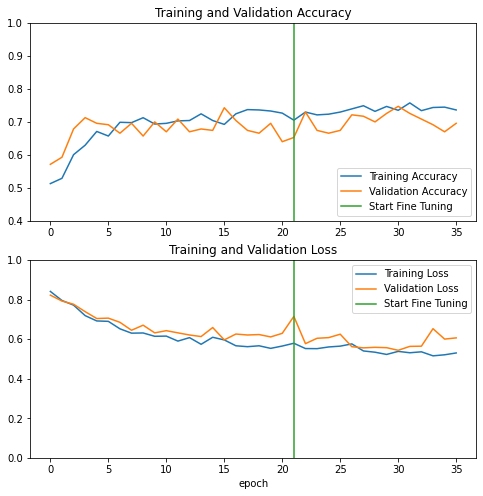

In [43]:
acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']

loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.4, 1])
plt.plot([history.epoch[-1]+1,history.epoch[-1]+1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([history.epoch[-1]+1,history.epoch[-1]+1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [44]:
cnn.save("my_model.h5")

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [45]:
test_gen = ImageDataGenerator(rescale=1/255.)
test_flow_gen = test_gen.flow_from_directory(directory='convert_test_512',
                                            target_size=(512, 512),  # 사용할 CNN 모델 입력 사이즈에 맞게 resize
                                            class_mode='binary',
                                            batch_size=32,
                                            shuffle=False)

Found 4 images belonging to 1 classes.


In [46]:
cnn_pred = cnn.predict(test_flow_gen)
cnn_pred

array([[0.6413999 ],
       [0.6712012 ],
       [0.6643429 ],
       [0.49424785]], dtype=float32)

In [47]:
sub = pd.DataFrame(test["patient_id"].copy())
sub["CE"] = cnn_pred
sub["CE"] = sub["CE"].apply(lambda x : 0 if x<0 else x)
sub["CE"] = sub["CE"].apply(lambda x : 1 if x>1 else x)
sub["LAA"] = 1- sub["CE"]

sub = sub.groupby("patient_id").mean()
sub = sub[["CE", "LAA"]].round(6).reset_index()
sub

,patient_id,CE,LAA
0,006388,0.641400,0.358600
1,008e5c,0.671201,0.328799
2,00c058,0.664343,0.335657
3,01adc5,0.494248,0.505752


In [48]:
sub.to_csv("submission.csv", index = False)
!head submission.csv

patient_id,CE,LAA
006388,0.6414,0.3586
008e5c,0.671201,0.328799
00c058,0.664343,0.335657
01adc5,0.494248,0.505752
